In [2]:
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
files.upload()

Output hidden; open in https://colab.research.google.com to view.

In [3]:
fichier = open('The-Lord-of-the-Rings.txt', 'r', encoding='utf-8')

# Lire les 24000 premières lignes du fichier
nombre_lignes_voulues = 24000
texte = ""
for i in range(nombre_lignes_voulues):
    ligne = fichier.readline()
    if not ligne:
        break
    texte += ligne

# Fermer le fichier après avoir lu les lignes nécessaires
fichier.close()


In [4]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import word_tokenize

# Téléchargez le modèle VADER (Valence Aware Dictionary and sEntiment Reasoner)
nltk.download('vader_lexicon')
nltk.download('punkt')

# Charger le modèle de l'analyseur de sentiments VADER
sid = SentimentIntensityAnalyzer()

# Rechercher le personnage "Frodo" dans le texte et effectuer l'analyse de sentiments pour ses phrases
personnage = "Frodo"
sentiments_frodo = []

# Découpez le texte en phrases
sentences = nltk.sent_tokenize(texte)

for sentence in sentences:
    if personnage in sentence:
        # Analyse de sentiments pour les phrases contenant "Frodo"
        sentiment = sid.polarity_scores(sentence)['compound']
        sentiments_frodo.append(sentiment)

# Calculer le score global de sentiment pour Frodo
score_global_frodo = sum(sentiments_frodo) / len(sentiments_frodo)

# Afficher le score global de sentiment pour Frodo
print("Analyse de sentiments pour Frodo dans le livre :")
print("Score global:", score_global_frodo)

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\récup\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\récup\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Analyse de sentiments pour Frodo dans le livre :
Score global: 0.02899849974133465


In [5]:
import pandas as pd
# Liste des personnages à analyser
personnages = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli","Legolas", "Saruman", "Orcs"]

# Découpez le texte en phrases
sentences = nltk.sent_tokenize(texte)

# Créer un DataFrame pour stocker les résultats
df = pd.DataFrame(columns=['Nom', 'Score'])

# Analyse de sentiments pour chaque personnage
for personnage in personnages:
    sentiments_personnage = []
    for sentence in sentences:
        if personnage in sentence:
            # Analyse de sentiments pour les phrases contenant le personnage
            sentiment = sid.polarity_scores(sentence)['compound']
            sentiments_personnage.append(sentiment)

    # Calculer le score global de sentiment pour le personnage
    score_global_personnage = sum(sentiments_personnage) / len(sentiments_personnage)

    # Ajouter le résultat dans le DataFrame
    df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)

# Afficher le DataFrame avec les résultats
print(df)

C:\Users\récup\AppData\Local\Temp\ipykernel_3276\983854711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\récup\AppData\Local\Temp\ipykernel_3276\983854711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\récup\AppData\Local\Temp\ipykernel_3276\983854711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)
C:\Users\récup\AppData\Local\Temp\ipykernel_3276\983854711.py:24: FutureWarning: The frame.append method is deprecated and will be

       Nom     Score
0    Frodo  0.028998
1  Gandalf  0.052166
2      Sam -0.006818
3  Aragorn  0.028213
4    Gimli  0.022091
5  Legolas  0.021246
6  Saruman -0.037569
7     Orcs -0.070411


C:\Users\récup\AppData\Local\Temp\ipykernel_3276\983854711.py:24: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'Nom': personnage, 'Score': score_global_personnage}, ignore_index=True)


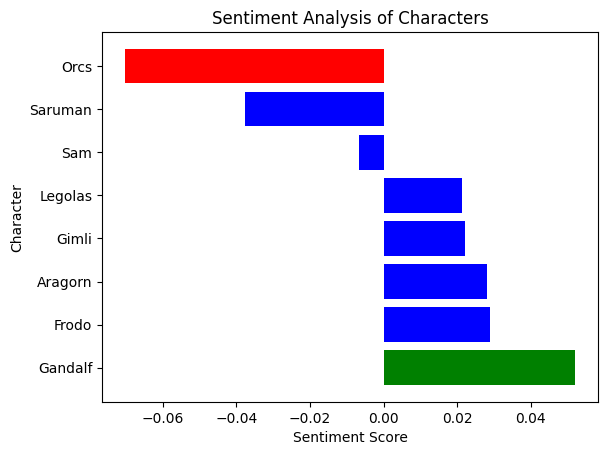

In [6]:
# Define a function to categorize the sentiment scores
def categorize_sentiment(score):
    if score >= 0.05:
        return 'Positive'
    elif score <= -0.05:
        return 'Negative'
    else:
        return 'Neutral'

# Apply the categorize_sentiment function to create a new column
df['Sentiment'] = df['Score'].apply(categorize_sentiment)

# Sort the DataFrame by 'Score' in descending order
df = df.sort_values(by='Score', ascending=False)

# Create the horizontal bar plot
plt.barh(df['Nom'], df['Score'], color=df['Sentiment'].map({'Positive': 'g', 'Negative': 'r', 'Neutral': 'b'}))

# Add labels and title
plt.xlabel('Sentiment Score')
plt.ylabel('Character')
plt.title('Sentiment Analysis of Characters')

# Show the plot
plt.show()

In [7]:
# Analyse de sentiments pour chaque personnage
df1 = pd.DataFrame(columns=['Nom', 'Positif', 'Negatif', 'Neutre'])

# Analyse de sentiments pour chaque personnage
for personnage in personnages:
    positive_count = 0
    negative_count = 0
    neutral_count = 0
    total_count = 0
    for sentence in sentences:
        if personnage in sentence:
            # Analyse de sentiments pour les phrases contenant le personnage
            sentiment = sid.polarity_scores(sentence)['compound']
            if sentiment >= 0.05:
                positive_count += 1
            elif sentiment <= -0.05:
                negative_count += 1
            else:
                neutral_count += 1
            total_count += 1

    # Calculate percentages
    if total_count > 0:
        positive_percentage = (positive_count / total_count) * 100
        negative_percentage = (negative_count / total_count) * 100
        neutral_percentage = (neutral_count / total_count) * 100
    else:
        positive_percentage = 0
        negative_percentage = 0
        neutral_percentage = 0

    # Add the result to the DataFrame
    df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)

C:\Users\récup\AppData\Local\Temp\ipykernel_3276\1620103238.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)
C:\Users\récup\AppData\Local\Temp\ipykernel_3276\1620103238.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_percentage, 'Neutre': neutral_percentage}, ignore_index=True)
C:\Users\récup\AppData\Local\Temp\ipykernel_3276\1620103238.py:33: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df1 = df1.append({'Nom': personnage, 'Positif': positive_percentage, 'Negatif': negative_per

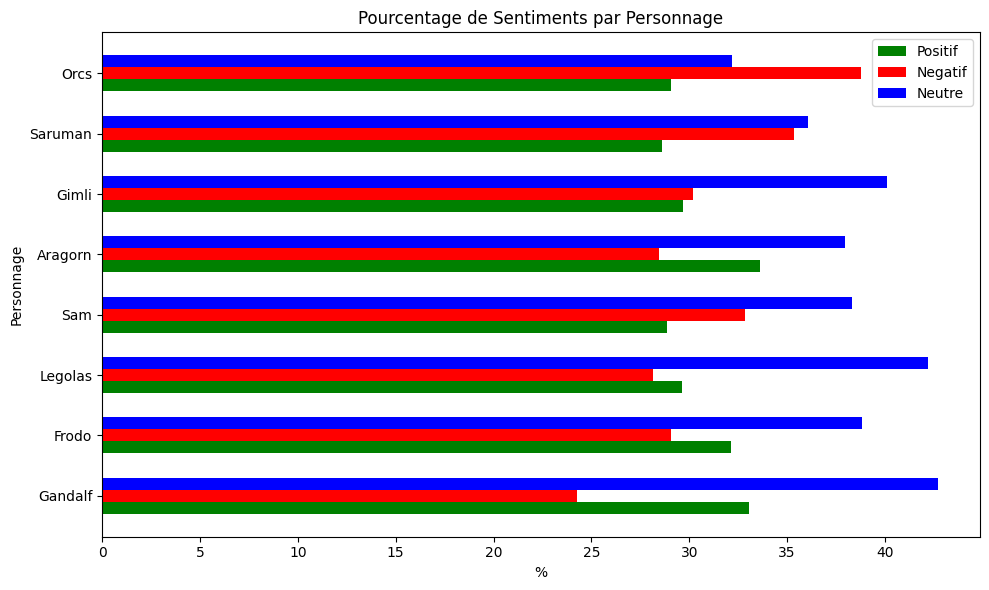

In [8]:

# Create the horizontal bar plots
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.2
bar_positions = df.index

ax.barh(bar_positions - bar_width, df1['Positif'], height=bar_width, label='Positif', color='green')
ax.barh(bar_positions, df1['Negatif'], height=bar_width, label='Negatif', color='red')
ax.barh(bar_positions + bar_width, df1['Neutre'], height=bar_width, label='Neutre', color='blue')

# Add labels and title
ax.set_xlabel('%')
ax.set_ylabel('Personnage')
ax.set_title('Pourcentage de Sentiments par Personnage')
ax.set_yticks(bar_positions)
ax.set_yticklabels(df1['Nom'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

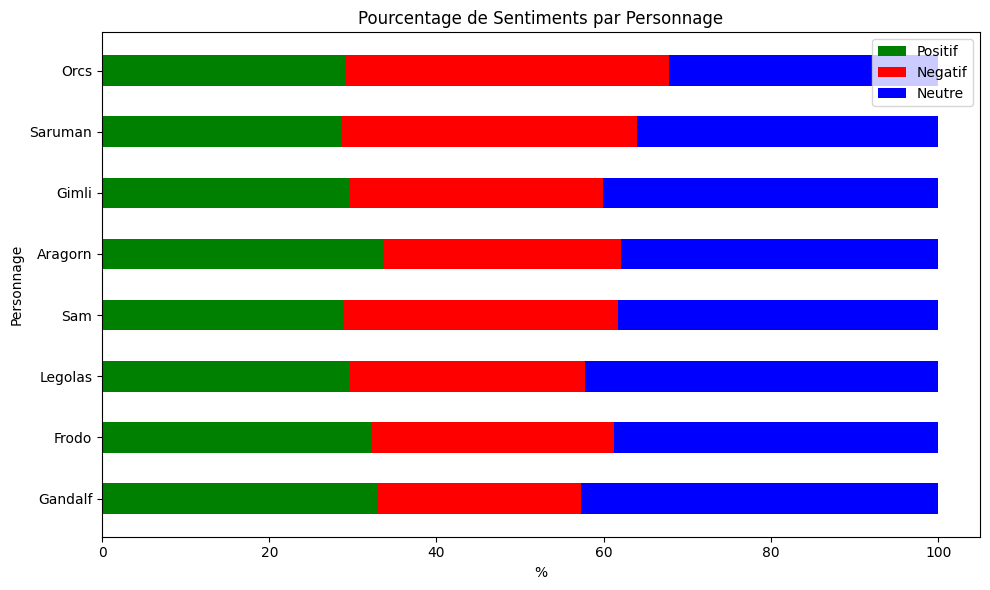

In [9]:
# Create the horizontal bar plot
fig, ax = plt.subplots(figsize=(10, 6))

bar_width = 0.5
bar_positions = df.index

ax.barh(bar_positions, df1['Positif'], height=bar_width, label='Positif', color='green')
ax.barh(bar_positions, df1['Negatif'], height=bar_width, left=df1['Positif'], label='Negatif', color='red')
ax.barh(bar_positions, df1['Neutre'], height=bar_width, left=df1['Positif'] + df1['Negatif'], label='Neutre', color='blue')

# Add labels and title
ax.set_xlabel('%')
ax.set_ylabel('Personnage')
ax.set_title('Pourcentage de Sentiments par Personnage avec nltk')
ax.set_yticks(bar_positions)
ax.set_yticklabels(df1['Nom'])
ax.legend()

# Show the plot
plt.tight_layout()
plt.show()

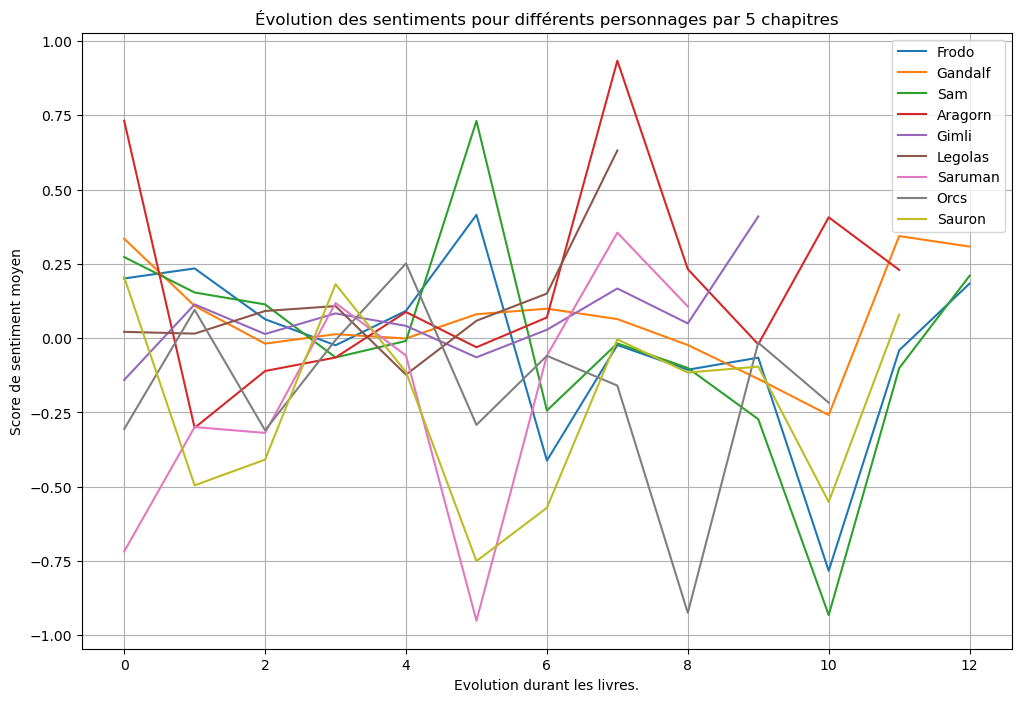

In [10]:
def calculate_average_sentiment(character, chapter_text, sia):
    character_occurrences = [sentence for sentence in chapter_text if character in sentence]
    if not character_occurrences:
        return None

    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in character_occurrences]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return average_sentiment

def split_text_into_chapters(text, chapter_pattern):
    chapters = []
    current_chapter = []

    for line in text.split('\n'):
        if chapter_pattern in line:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))
            current_chapter = [line]
        else:
            current_chapter.append(line)

    if current_chapter:
        chapters.append('\n'.join(current_chapter))

    return chapters


# Initialiser le SentimentIntensityAnalyzer de NLTK
sia = SentimentIntensityAnalyzer()


chapter_pattern = "Chapter"
chapters = split_text_into_chapters(texte[3110:], chapter_pattern)

characters = ["Frodo", "Gandalf", "Sam", "Aragorn", "Gimli", "Legolas", "Saruman", "Orcs", "Sauron"]

plt.figure(figsize=(12, 8))

grouped_chapters = 5
num_groups = (len(chapters) + grouped_chapters - 1) // grouped_chapters

for character in characters:
    character_avg_sentiments = []

    for i in range(num_groups):
        start_chapter = i * grouped_chapters
        end_chapter = min((i + 1) * grouped_chapters, len(chapters))

        group_chapters = chapters[start_chapter:end_chapter]
        group_sentiments = [calculate_average_sentiment(character, chapter.split('\n'), sia) for chapter in group_chapters]

        # Filtrer les valeurs None
        valid_sentiments = [sentiment for sentiment in group_sentiments if sentiment is not None]

        if valid_sentiments:
            avg_group_sentiment = sum(valid_sentiments) / len(valid_sentiments)
            character_avg_sentiments.append(avg_group_sentiment)

    plt.plot(character_avg_sentiments, label=character)

plt.title("Évolution des sentiments pour différents personnages par 5 chapitres")
plt.xlabel("Evolution durant les livres.")
plt.ylabel("Score de sentiment moyen")
plt.grid(True)
plt.legend()
plt.show()

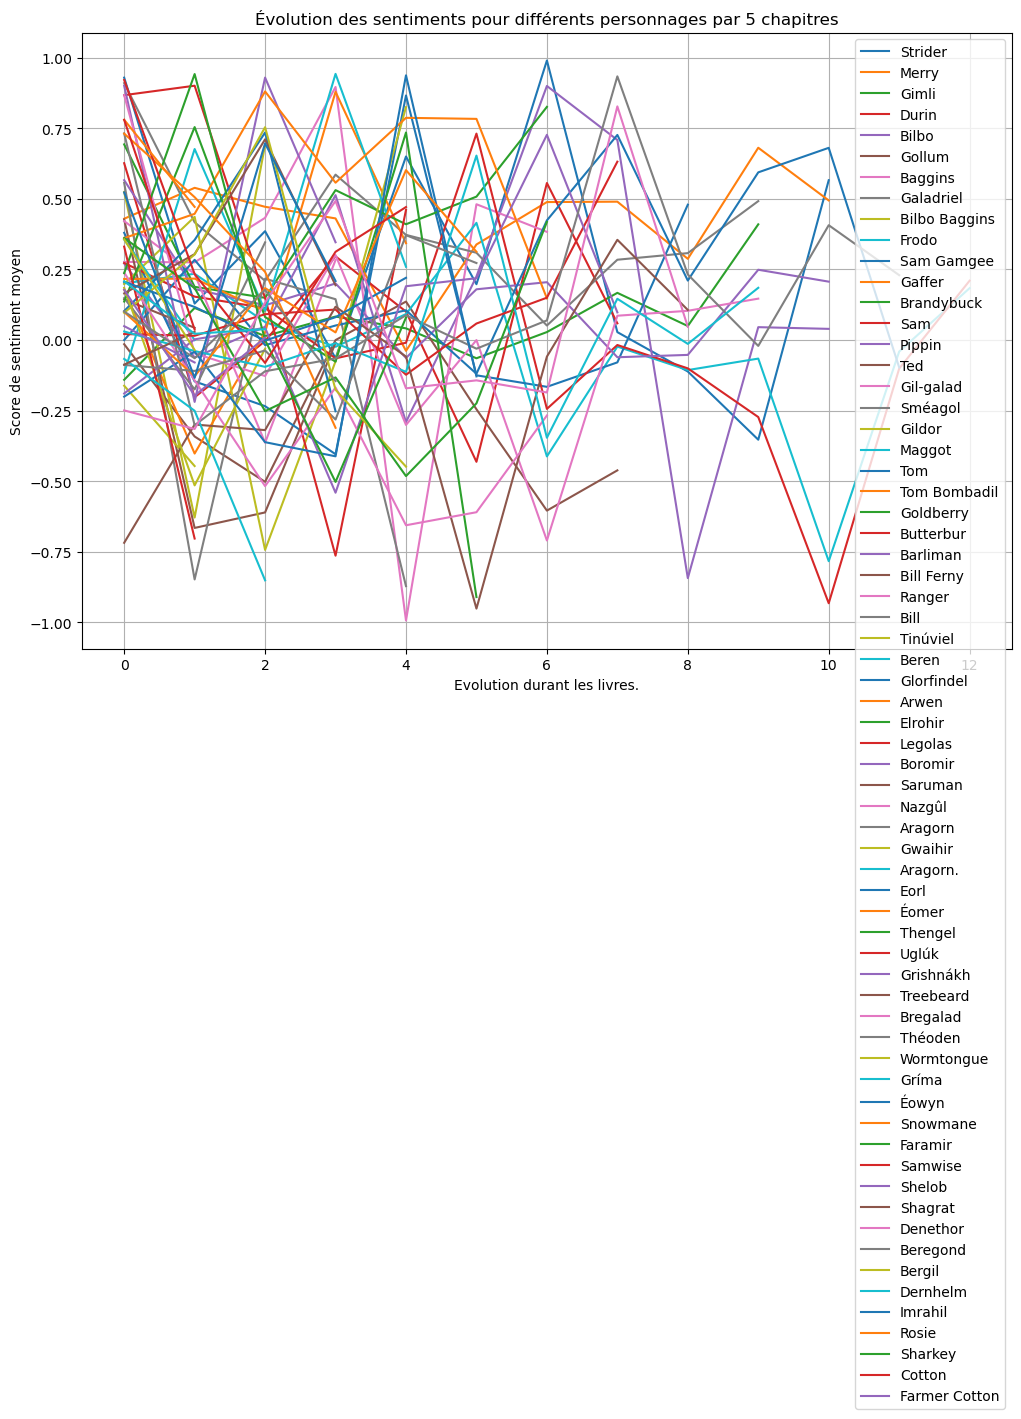

In [11]:
def calculate_average_sentiment(character, chapter_text, sia):
    character_occurrences = [sentence for sentence in chapter_text if character in sentence]
    if not character_occurrences:
        return None

    sentiment_scores = [sia.polarity_scores(sentence)["compound"] for sentence in character_occurrences]
    average_sentiment = sum(sentiment_scores) / len(sentiment_scores)
    return average_sentiment

def split_text_into_chapters(text, chapter_pattern):
    chapters = []
    current_chapter = []

    for line in text.split('\n'):
        if chapter_pattern in line:
            if current_chapter:
                chapters.append('\n'.join(current_chapter))
            current_chapter = [line]
        else:
            current_chapter.append(line)

    if current_chapter:
        chapters.append('\n'.join(current_chapter))

    return chapters


# Initialiser le SentimentIntensityAnalyzer de NLTK
sia = SentimentIntensityAnalyzer()


chapter_pattern = "Chapter"
chapters = split_text_into_chapters(texte[3110:], chapter_pattern)

characters = ['Strider', 'Merry', 'Gimli', 'Durin', 'Bilbo', 'Gollum', 'Baggins', 'Galadriel', 'Bilbo Baggins', 'Frodo', 'Sam Gamgee', 'Gaffer', 'Brandybuck', 'Sam', 'Pippin', 'Ted', 'Gil-galad', 'Sméagol', 'Gildor', 'Maggot', 'Tom', 'Tom Bombadil', 'Goldberry', 'Butterbur', 'Barliman', 'Bill Ferny', 'Ranger', 'Bill', 'Tinúviel', 'Beren', 'Glorfindel', 'Arwen', 'Elrohir', 'Legolas', 'Boromir', 'Saruman', 'Nazgûl', 'Aragorn', 'Gwaihir', 'Aragorn.', 'Eorl', 'Éomer', 'Thengel', 'Uglúk', 'Grishnákh', 'Treebeard', 'Bregalad', 'Théoden', 'Wormtongue', 'Gríma', 'Éowyn', 'Snowmane', 'Faramir', 'Samwise', 'Shelob', 'Shagrat', 'Denethor', 'Beregond', 'Bergil', 'Dernhelm', 'Imrahil', 'Rosie', 'Sharkey', 'Cotton', 'Farmer Cotton']


plt.figure(figsize=(12, 8))

grouped_chapters = 5
num_groups = (len(chapters) + grouped_chapters - 1) // grouped_chapters

for character in characters:
    character_avg_sentiments = []

    for i in range(num_groups):
        start_chapter = i * grouped_chapters
        end_chapter = min((i + 1) * grouped_chapters, len(chapters))

        group_chapters = chapters[start_chapter:end_chapter]
        group_sentiments = [calculate_average_sentiment(character, chapter.split('\n'), sia) for chapter in group_chapters]

        # Filtrer les valeurs None
        valid_sentiments = [sentiment for sentiment in group_sentiments if sentiment is not None]

        if valid_sentiments:
            avg_group_sentiment = sum(valid_sentiments) / len(valid_sentiments)
            character_avg_sentiments.append(avg_group_sentiment)

    plt.plot(character_avg_sentiments, label=character)

plt.title("Évolution des sentiments pour différents personnages par 5 chapitres")
plt.xlabel("Evolution durant les livres.")
plt.ylabel("Score de sentiment moyen")
plt.grid(True)
plt.legend()
plt.show()